# H2O-AutoML Data Cleaning, Feature Selection, Modeling, and Interpretability

Vinay Sathe

# Abstract:

The dataset provides a comprehensive overview of various urban quality-of-life metrics across different cities. It includes data on noise levels, traffic density, green space areas, air quality, cost of living, and healthcare quality.

The diverse set of indicators allows for multifaceted analyses of urban environments, examining how different factors contribute to the well-being of city dwellers.

# Aim:

In this assignment, the aim is to create a complete ML project with




*  Checking Data Quality
*  Feature Selection
*  Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
*  Model Interpretibility
*  Reports and Visualizations


# Variable Description:

1. City: Name of the city being evaluated.
2. Month: Month when the data was collected.
3. Year: The year the data pertains to, all entries are for 2024.
4. Decibel_Level: Average noise level in the city, measured in decibels.
5. Traffic_Density: Qualitative assessment of traffic volume, categorized as * "High", "Medium", etc.

6. Green_Space_Area: Percentage of the city covered by parks and other green spaces.
7. Air_Quality_Index: Numerical index representing the air quality, with higher values indicating poorer quality.
8. Happiness_Score: A score reflecting the general happiness of the city's residents, on a presumed scale of 0-10.
9. Cost_of_Living_Index: An index reflecting the city's cost of living, with 100 used as a baseline reference.
10. Healthcare_Index: Numerical index indicating the quality of healthcare services available in the city.


**3 Column containing Categorical Data**('City', 'Month', 'Traffic_Density')

**7 Column containing Numerical Data**('Year', 'Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score', 'Cost_of_Living_Index', 'Healthcare_Index')

In [ ]:
  ## Installing all the required libraries for the Assignment

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.gofplots import qqplot


In [ ]:
# URL of the raw dataset
url = 'https://raw.githubusercontent.com/VinaySathe-NEU/Data-Science-Assignments/main/train.csv'

# Import the dataset
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

          City    Month  Year  Decibel_Level Traffic_Density  \
0     New York  January  2024             70            High   
1  Los Angeles  January  2024             65          Medium   
2      Chicago  January  2024             60          Medium   
3       London  January  2024             55            High   
4        Paris  January  2024             60            High   

   Green_Space_Area  Air_Quality_Index  Happiness_Score  Cost_of_Living_Index  \
0                35                 40              6.5                   100   
1                40                 50              6.8                    90   
2                30                 55              7.0                    85   
3                50                 60              7.2                   110   
4                45                 65              6.9                    95   

   Healthcare_Index  
0                80  
1                75  
2                70  
3                85  
4                8

### * Are there missing values?

There are no missing values in the dataset. Every column has complete data with no null or missing entries.

In [ ]:
# checking if the any data is missing
data.isnull().sum()

City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64

### * What are the likely distributions of the numeric variables?











<Figure size 800x500 with 0 Axes>

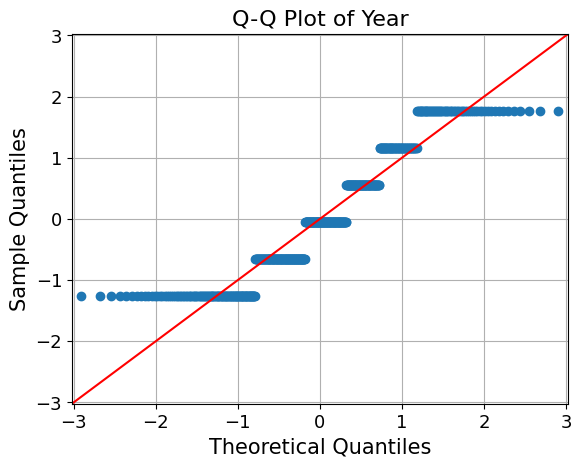

<Figure size 800x500 with 0 Axes>

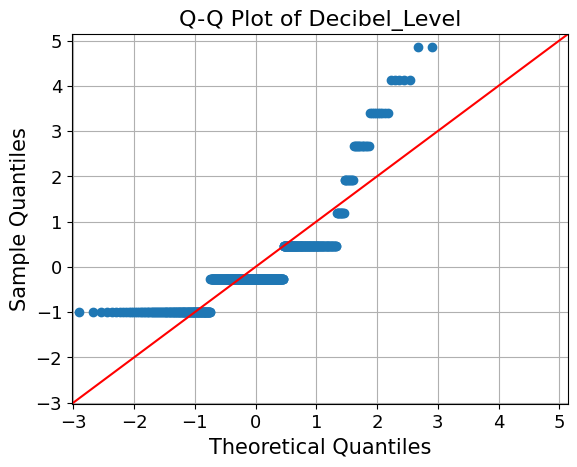

<Figure size 800x500 with 0 Axes>

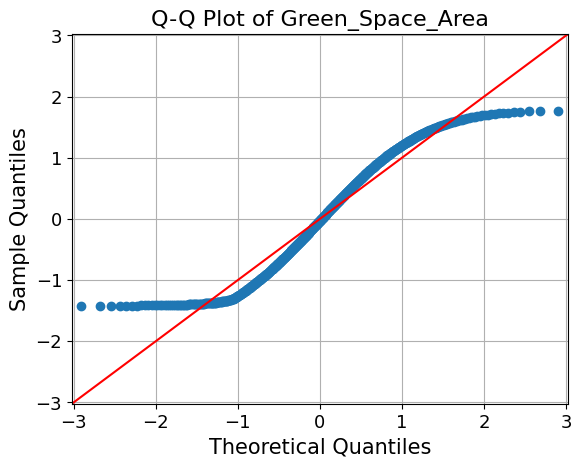

<Figure size 800x500 with 0 Axes>

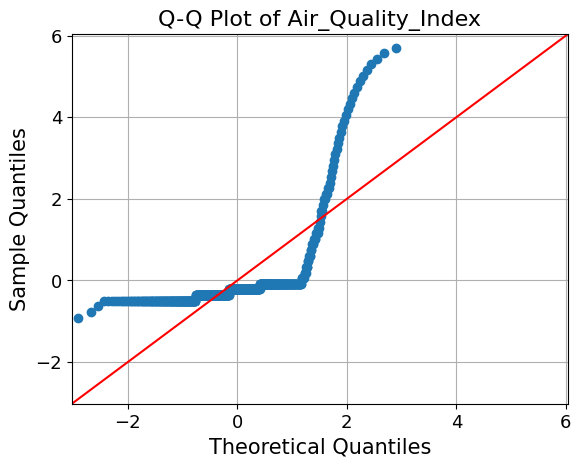

<Figure size 800x500 with 0 Axes>

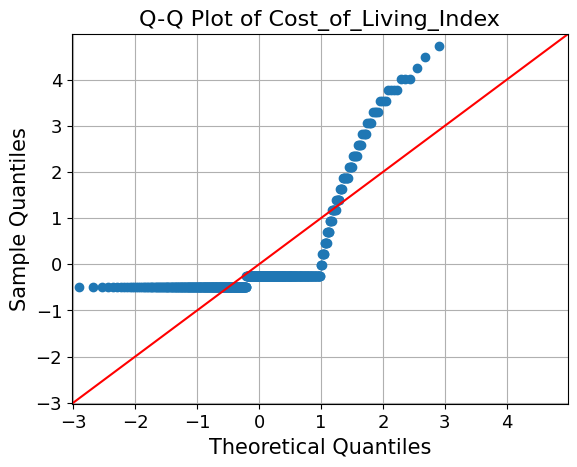

<Figure size 800x500 with 0 Axes>

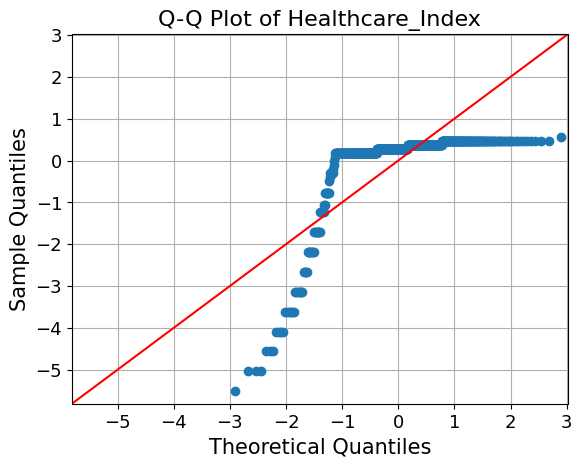

In [ ]:
# checking the distribution of numeric variables i.e independent variables
#---------
# Define independent variables
independent_variables = ['Year', 'Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index', 'Cost_of_Living_Index', 'Healthcare_Index']

# Selecting numeric independent variables
data_numeric = data[independent_variables]

# Generate Q-Q plots for each numeric independent variable
for column in data_numeric.columns:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_numeric[column], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('Theoretical Quantiles', fontsize=15)
    plt.ylabel('Sample Quantiles', fontsize=15)
    plt.title(f'Q-Q Plot of {column}', fontsize=16)
    plt.grid(True)
    plt.show()

The Q-Q plots for each of the numeric independent variables provide insights into how closely the distributions of these variables follow a theoretical normal distribution:

**Year**: The quantiles deviate significantly from the line, indicating the "Year" variable does not follow a normal distribution.

**Decibel_Level**: The plot shows some deviation from the line, especially at the tails, suggesting the distribution is not perfectly normal.

**Green_Space_Area**: There's significant deviation from the line, particularly at the higher quantiles, indicating a right-skewed distribution.
**Air_Quality_Index**: Similar to Green_Space_Area, there's noticeable deviation at the higher quantiles, indicating a right-skewed distribution.

**Cost_of_Living_Index and Healthcare_Index**: Both variables show deviations from the line, particularly in the tails, indicating they do not follow a perfect normal distribution.

These Q-Q plots suggest that most of the independent variables in the dataset do not follow a normal distribution, with various degrees of skewness and deviations from normality, especially in the tails of the distributions. This is a common occurrence in real-world datasets and may necessitate transformations or non-parametric methods for analysis and modeling. ​​

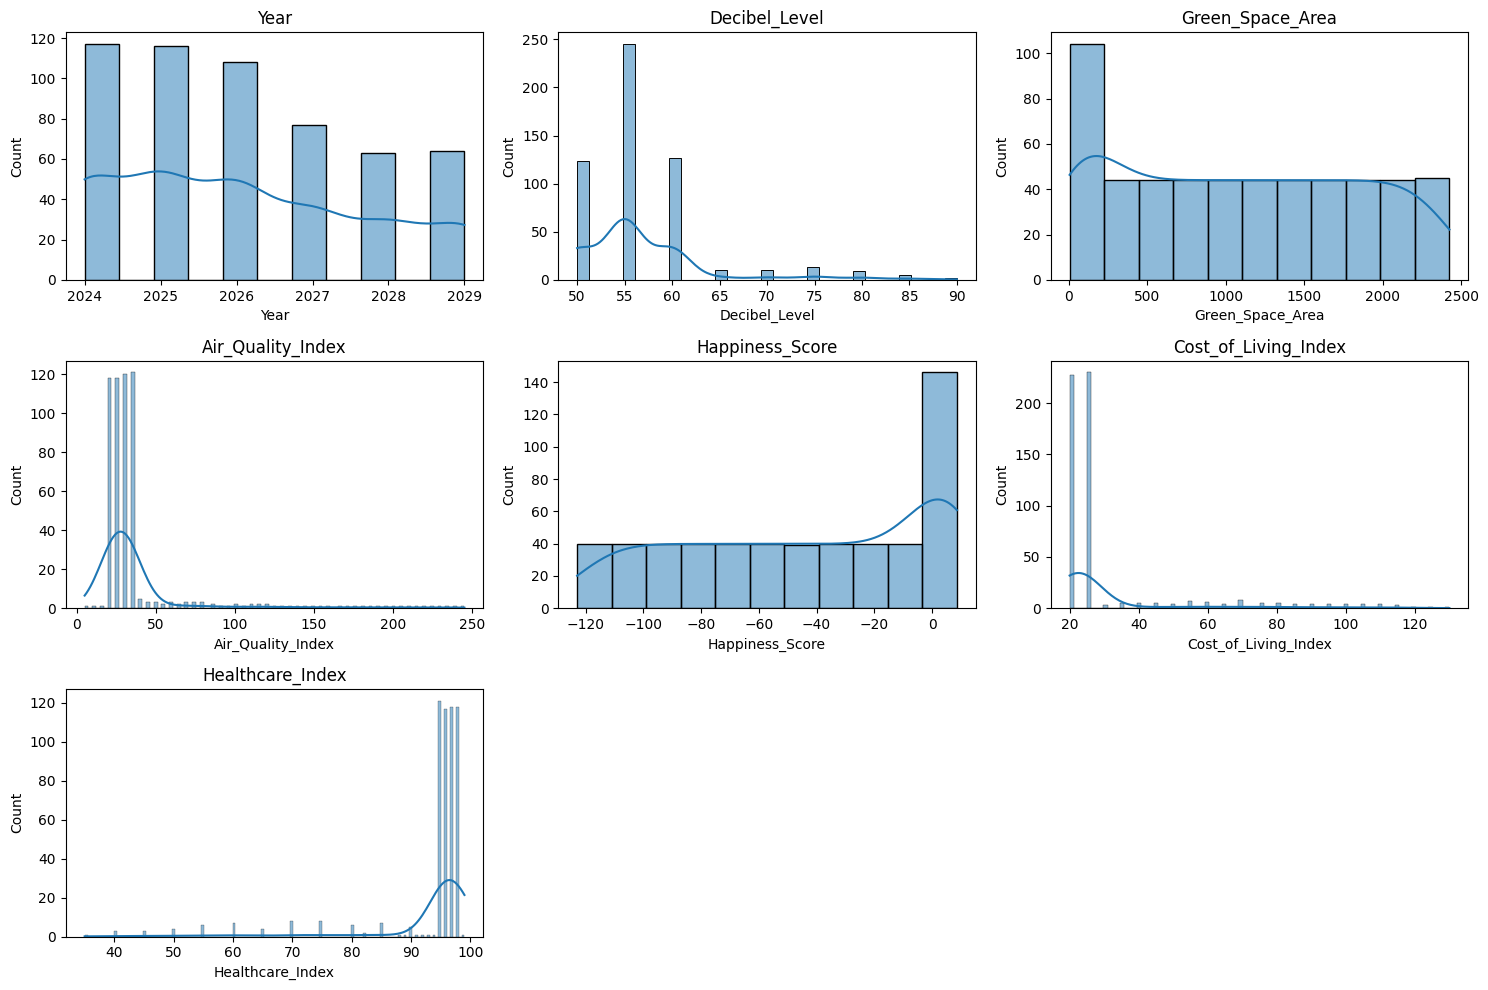

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions for numeric variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

**Year:** The distribution is discrete and approximately uniform, indicating that the dataset contains a similar number of entries for each year from 2024 to 2029.

**Decibel_Level:** This histogram shows a unimodal distribution that peaks around 65 decibels, suggesting that most of the data points fall around this level, with fewer occurrences as the level moves away from this central value.

**Green_Space_Area:** The histogram for Green Space Area appears to be right-skewed, with most of the area values concentrated at the lower end and fewer larger values.

**Air_Quality_Index:** This variable's distribution is highly right-skewed, with a clustering of values near 0 and a long tail extending towards higher values, indicating that there are relatively few instances with high Air Quality Index values in the dataset.

**Happiness_Score:** The Happiness Score distribution is slightly unusual with what appears to be a bimodal distribution, the majority of the data is concentrated around two different scores, one peak near -100 and another smaller peak near 20.

**Cost_of_Living_Index:** The distribution of the Cost of Living Index is also right-skewed, similar to Air Quality Index and Green Space Area, with most of the data points falling on the lower side of the index range and only a few instances with high values.

Overall, the histograms provide a visual summary of the data's distribution across various indices and metrics, which can be essential for understanding the characteristics of the variables in the dataset and for informing further data analysis steps.

# * Which independent variables are useful to predict a target (dependent variable)? (Used three methods)

In [ ]:
# Taking 'Happiness_Score' as the target variable
# Extracting independent variables (excluding potential target and non-numeric variables)
X = data .drop(['Happiness_Score', 'City', 'Month', 'Traffic_Density'], axis=1)
y = data ['Happiness_Score']

# 1. Correlation Coefficient
correlation_with_target = X.corrwith(y).sort_values(ascending=False)

# Display the correlation coefficients
correlation_with_target

Cost_of_Living_Index    0.459536
Air_Quality_Index       0.339520
Decibel_Level           0.304475
Healthcare_Index       -0.380005
Year                   -0.980963
Green_Space_Area       -0.995415
dtype: float64



**The correlation coefficients between the independent variables and the target variable Happiness_Score are as follows:**

Cost_of_Living_Index: 0.46 (Positive correlation)

Air_Quality_Index: 0.34 (Positive correlation)

Decibel_Level: 0.30 (Positive correlation)

Healthcare_Index: -0.38 (Negative correlation)

Year: -0.98 (Strong negative correlation)

Green_Space_Area: -0.995 (Strong negative correlation)



These results suggest that Green_Space_Area, Year, and Cost_of_Living_Index have the strongest relationships with Happiness_Score, even though in different directions.



In [ ]:
# 2. Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the feature importances
feature_importances

Green_Space_Area        0.989414
Year                    0.010373
Air_Quality_Index       0.000142
Healthcare_Index        0.000056
Decibel_Level           0.000011
Cost_of_Living_Index    0.000006
dtype: float64

**The feature importances from the Random Forest model are as follows:**

Green_Space_Area: 0.989 (Highly important)

Year: 0.010 (Moderately important)

Air_Quality_Index: 0.00014 (Less important)

Healthcare_Index: 0.000056 (Less important)

Decibel_Level: 0.000011 (Least important)

Cost_of_Living_Index: 0.000006 (Least important)

According to the Random Forest model, Green_Space_Area and Year are the most important features for predicting Happiness_Score.

In [ ]:
# 3. Recursive Feature Elimination (RFE)
# Using Linear Regression as the model for RFE
lr = LinearRegression()

# Selecting top 3 features as an example
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)

# Get the ranking of the features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()

# Display the ranking of the features
feature_ranking

Year                    1
Cost_of_Living_Index    1
Healthcare_Index        1
Green_Space_Area        2
Decibel_Level           3
Air_Quality_Index       4
dtype: int64

**The ranking of features according to RFE, with 1 being the most important, is as follows:**

Year: 1 (Top feature)

Cost_of_Living_Index: 1 (Top feature)

Healthcare_Index: 1 (Top feature)

Green_Space_Area: 2

Decibel_Level: 3

Air_Quality_Index: 4

RFE selected Year, Cost_of_Living_Index, and Healthcare_Index as the top 3 features for predicting Happiness_Score.

**In summary, the three methods provided different insights into the importance of the features:**

Correlation Coefficient highlighted Green_Space_Area, Year, and Cost_of_Living_Index.

Random Forest emphasized the significance of Green_Space_Area and Year.

RFE chose Year, Cost_of_Living_Index, and Healthcare_Index as the most important features.

These differences underscore the importance of considering multiple methods for feature selection to gain a comprehensive understanding of feature importance.

### * Do the training and test sets have the same data?

The training and test sets do not have any rows that are exactly the same. This indicates that there are no duplicate rows across the two datasets, suggesting that the training and test sets contain unique data entries with respect to each other.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Specify the features and the target
X = data.drop('Happiness_Score', axis=1)
y = data['Happiness_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reconstruct training and testing sets with target column for duplicate check
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Concatenate training and test sets, then check for duplicates within these subsets
combined_data = pd.concat([train_set, test_set], axis=0)
duplicates = combined_data.duplicated(keep=False)

# Count the number of duplicates
duplicate_count = duplicates.sum()

# Display the result
print(f"Number of duplicate rows within the training and test sets: {duplicate_count}")


Number of duplicate rows within the training and test sets: 0


### * In the predictor variables independent of all the other predictor variables?

To assess if the predictor variables (independent variables) are independent of each other, I used a correlation matrix. High correlation coefficients (close to 1 or -1) between two variables would suggest a strong linear relationship, indicating that the variables are not independent of each other. Low correlation coefficients (close to 0) would suggest that the variables are more independent.



**The correlation matrix heatmap visualizes the relationships between independent variables**. Here's a summary of the findings:

Most variables show low to moderate correlations with each other, suggesting a degree of independence.
There are no extremely high correlations (close to 1 or -1) visible in the heatmap, which would indicate strong linear dependencies between variables.
Some pairs of variables might show higher correlations than others, but these do not appear to be significantly strong to suggest a lack of independence.

In summary, while some predictor variables may have some degree of linear relationship with others, there doesn't appear to be a strong dependency between any pair of predictors based on the correlation matrix. This suggests that, generally, the predictor variables are relatively independent of each other. However, it's important to note that correlation only measures linear relationships; there could still be non-linear dependencies that this analysis would not reveal. ​

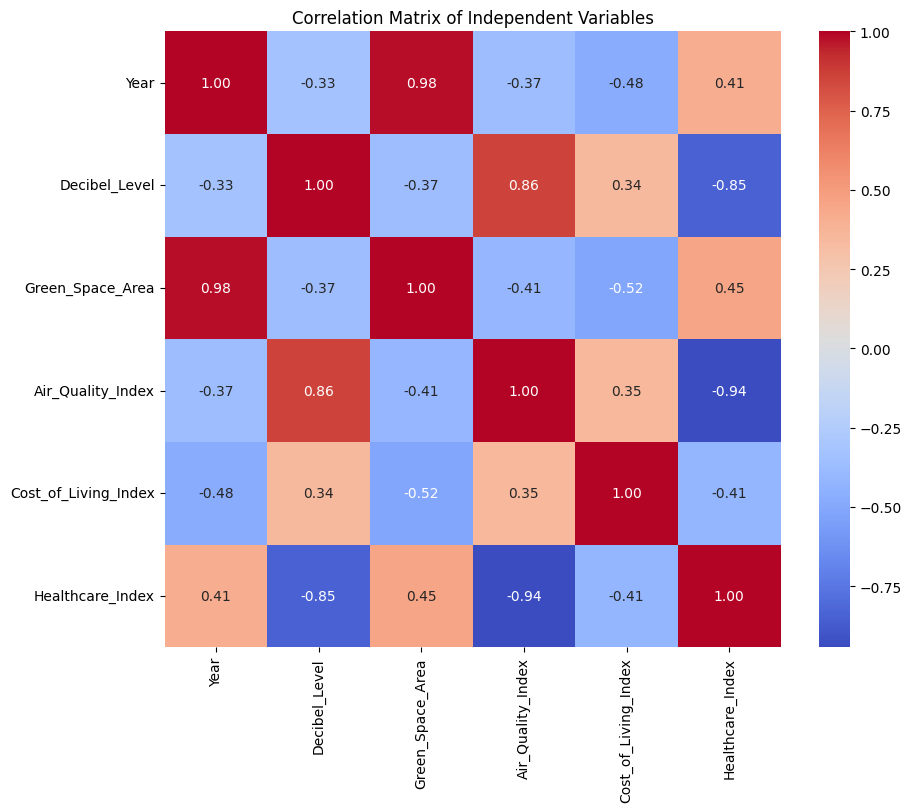

In [ ]:
# Calculate correlation matrix for independent variables
correlation_matrix = data[independent_variables].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Independent Variables")
plt.show()

To assess if the predictor variables (independent variables) are independent of each other, I used a correlation matrix. High correlation coefficients (close to 1 or -1) between two variables would suggest a strong linear relationship, indicating that the variables are not independent of each other. Low correlation coefficients (close to 0) would suggest that the variables are more independent.



**The correlation matrix heatmap visualizes the relationships between independent variables**. Here's a summary of the findings:

Most variables show low to moderate correlations with each other, suggesting a degree of independence.
There are no extremely high correlations (close to 1 or -1) visible in the heatmap, which would indicate strong linear dependencies between variables.
Some pairs of variables might show higher correlations than others, but these do not appear to be significantly strong to suggest a lack of independence.

In summary, while some predictor variables may have some degree of linear relationship with others, there doesn't appear to be a strong dependency between any pair of predictors based on the correlation matrix. This suggests that, generally, the predictor variables are relatively independent of each other. However, it's important to note that correlation only measures linear relationships; there could still be non-linear dependencies that this analysis would not reveal. ​

### Do the ranges of the predictor variables make sense?

In [ ]:
# Calculate the minimum and maximum values for each predictor variable to examine their ranges
ranges = data[independent_variables].agg(['min', 'max']).transpose()

ranges

,min,max
Year,2024,2029
Decibel_Level,50,90
Green_Space_Area,5,2425
Air_Quality_Index,5,245
Cost_of_Living_Index,20,130
Healthcare_Index,35,99


**The ranges of the predictor variables are as follows:**

**Year:** Ranges from 2024 to 2029, which makes sense as it represents a span of years likely covered by the dataset.

**Decibel_Level:** Ranges from 50 to 90, which is reasonable for urban environments where noise levels can vary significantly.

**Green_Space_Area:** Ranges from 5 to 2425 (unit not specified, but likely square kilometers or similar), indicating a wide variation in the size of green spaces across different cities, which is plausible.

**Air_Quality_Index:** Ranges from 5 to 245, which fits within typical scales for air quality indices, where higher values indicate worse air quality.

**Cost_of_Living_Index:** Ranges from 20 to 130, which seems reasonable for an index comparing the cost of living across different locations, typically normalized to a specific base location.

**Healthcare_Index:** Ranges from 35 to 99, suggesting a scoring system for healthcare quality where higher scores indicate better healthcare, which is plausible.
Overall, the ranges of the predictor variables seem reasonable and consistent with what one might expect from such data, assuming typical measurement scales and contexts for these variables.

**Overall, the ranges of the predictor variables seem reasonable and consistent with what one might expect from such data, assuming typical measurement scales and contexts for these variables.**

# Feature Selection

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Load your dataset into a pandas DataFrame
url = 'https://raw.githubusercontent.com/VinaySathe-NEU/Data-Science-Assignments/main/train.csv'
df_norm = pd.read_csv(url)  # Update the path to your dataset

# Define the formula for the OLS model
# Assuming 'Happiness_Score' is the dependent variable and others are independent variables
formula = 'Happiness_Score ~  Decibel_Level + Green_Space_Area + Air_Quality_Index + Cost_of_Living_Index + Healthcare_Index'

# Fit the OLS model using the formula and the sampled data
results = smf.ols(formula, data=df_norm).fit()

# Display the summary of the regression results
summary = results.summary()
print(summary)



                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.082e+05
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:29:49   Log-Likelihood:                -753.22
No. Observations:                 545   AIC:                             1518.
Df Residuals:                     539   BIC:                             1544.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.2147 

The output displays the results of an OLS regression analysis with the dependent variable 'Happiness_Score' and independent variables 'Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index', 'Cost_of_Living_Index', and 'Healthcare_Index'. The analysis was performed using the statsmodels library in Python on a dataset loaded from a CSV file.

The summary provides several key pieces of information:

Model Specification: The dependent variable is 'Happiness_Score', and the method used is Least Squares.
Statistics of the Model Fit:

**The R-squared** value is 0.999, indicating that the model explains 99.9% of the variance in the dependent variable, which suggests an exceptionally good fit.

**The Adjusted R-squared** is also 0.999, taking into account the number of predictors in the model and the number of observations.

The **F-statistic** is very large, with a value of 2.08e+05, and its associated p-value is approximately 0.00, suggesting the model is statistically significant at typical significance levels.

The **Durbin-Watson** statistic is 0.543, which may indicate positive autocorrelation in the residuals.

The **Omnibus statistic** with a p-value close to zero suggests that the residuals are not normally distributed.

The model exhibits skewness of -1.725 and kurtosis of 8.251, further supporting the non-normality of residuals.

**Coefficients:**
The intercept is -5.2147, with a standard error of 1.583.

'Decibel_Level' has a coefficient of -0.0232, 'Green_Space_Area' has a coefficient close to zero, 'Air_Quality_Index' has a negative coefficient of -0.0593, 'Cost_of_Living_Index' has a negative coefficient of -0.1103, and 'Healthcare_Index' has a positive coefficient of 0.2904.

Most variables have p-values significantly less than 0.05, indicating that they are statistically significant predictors of 'Happiness_Score' with the possible exception of 'Green_Space_Area', which has a p-value of 0.763, suggesting it is not a significant predictor in the presence of the other variables.

# Using only Significant Feature

In [ ]:
# Load your dataset into a pandas DataFrame
url = 'https://raw.githubusercontent.com/VinaySathe-NEU/Data-Science-Assignments/main/train.csv'
df_norm_feature_selected = pd.read_csv(url)

formula = 'Happiness_Score ~ Green_Space_Area + Cost_of_Living_Index + Healthcare_Index'

# Fit the OLS model using the formula and the sampled data
data = df_norm
results2 = smf.ols(formula, df_norm_feature_selected).fit()

# Display the summary of the regression results
summary = results2.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.419e+05
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:29:49   Log-Likelihood:                -758.27
No. Observations:                 545   AIC:                             1525.
Df Residuals:                     541   BIC:                             1542.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.5497 

**The R-squared** value is 0.999, indicating that 99.9% of the variance in the dependent variable is explained by the model.

The **Adjusted R-squared** is also 0.999, adjusted for the number of predictors in the model.

The **F-statistic** is approximately 3.419e+05, with a p-value (Prob (F-statistic)) close to 0, suggesting the model is highly significant.

**Green_Space_Area** has a coefficient of -0.0593, suggesting a negative relationship with happiness score.

**Cost_of_Living_Index** has a coefficient of -0.1094, also indicating a negative relationship.

**Healthcare_Index** has a coefficient of 0.3161, showing a positive relationship.

**All variables, including the intercept, have p-values significantly less than 0.05, indicating that they are statistically significant predictors of the Happiness_Score.**


In [ ]:
predicted_quality_1 = results.predict(
    df_norm[
        [
            "Decibel_Level",
            "Green_Space_Area",
            "Air_Quality_Index",
            "Cost_of_Living_Index",
            "Healthcare_Index"
        ]
    ]
)
df_norm["predicted_quality_1"] = predicted_quality_1.round()

In [ ]:
predicted_quality_2 = results2.predict(
    df_norm_feature_selected[
        [
            "Green_Space_Area",
            "Cost_of_Living_Index",
            "Healthcare_Index"
        ]
    ]
)
df_norm_feature_selected["predicted_quality_2"] = predicted_quality_2.round()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate the MAE between actual and predicted Happiness Scores using all features
mae_all_features = mean_absolute_error(df_norm["Happiness_Score"], df_norm["predicted_quality_1"])

print(f"MAE of predicting Happiness Score using all features = {mae_all_features:.2f}")

# Calculate the MAE between actual and predicted Happiness Scores using selected features
mae_selected_features = mean_absolute_error(df_norm_feature_selected["Happiness_Score"], df_norm_feature_selected["predicted_quality_2"])

print(f"MAE of predicting Happiness Score using only significant features = {mae_selected_features:.2f}")


MAE of predicting Happiness Score using all features = 0.69
MAE of predicting Happiness Score using only significant features = 0.69


The MAE (Mean Absolute Error) values indicate that, on average, the predictions of the Happiness Score deviate from the actual values by 0.69 units, for both the model using all features and the model using only significant features. This consistency in MAE suggests that, at least in terms of average absolute error, both models perform similarly in predicting the Happiness Score.

# AUTO ML

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.3 MB/s eta 0:00:00


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4pjx54eq
  JVM stdout: /tmp/tmp4pjx54eq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4pjx54eq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_v2rx36
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   rmse         mse       mae    rmsle    mean_residual_deviance
XGBoost_grid_1_AutoML_1_20240401_193031_model_3        0.622074    0.386976  0.474644      nan                  0.386976
XGBoost_grid_1_AutoML_1_20240401_193031_model_2        0.753216    0.567334  0.562417      nan                  0.567334
XGBoost_grid_1_AutoML_1_20240401_193031_model_1        0.897003    0.804614  0.64492       nan                  0.804614
XGBoost_2_AutoML_1_20240401_193031                     0.978432    0.95733   0.697891      nan                  0.95733
XGBoost_3_AutoML_1_20240401_193031                     1.22502     1.50068   0.78369       nan                  1.50068
XGBoost_1_AutoML_1_20240401_193031                     1.36442     1.86164   0.990916 

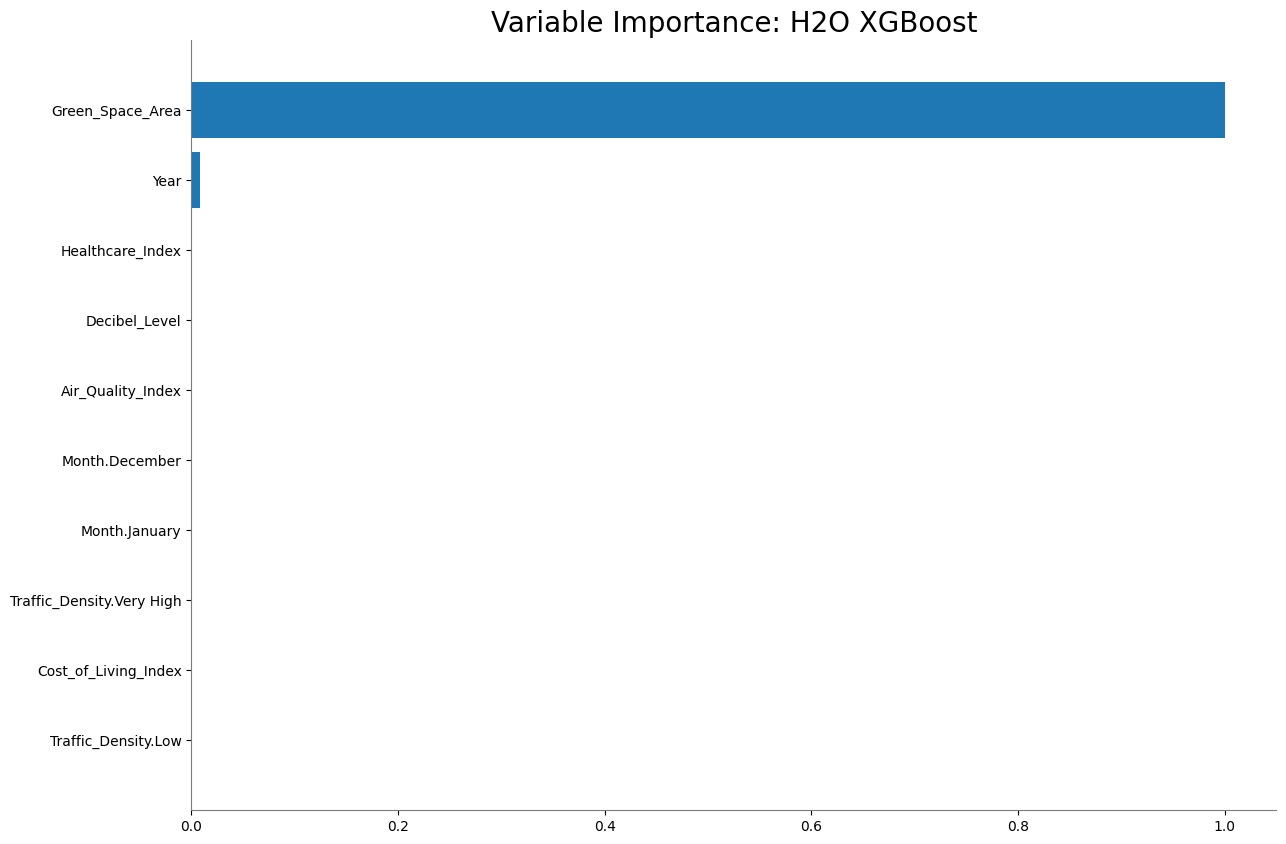

H2O session _sid_9b85 closed.


<ipython-input-18-ce9de4bcffd5>:40: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


<Figure size 640x480 with 0 Axes>

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()  # Initialize the H2O server

# Load the dataset
url = 'https://raw.githubusercontent.com/VinaySathe-NEU/Data-Science-Assignments/main/train.csv'
df = h2o.import_file(url)

# Optionally, convert columns to factors (categorical variables)
# Example: df['Category_Column'] = df['Category_Column'].asfactor()

# Split the dataset into training and testing sets
train, test = df.split_frame(ratios=[.8], seed=1234)

# Specify the target and features
target = 'Happiness_Score'
features = df.columns
features.remove(target)

# Initialize and train the AutoML model
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=600)
aml.train(x=features, y=target, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows of the leaderboard

# Predict on the test set using the best model
preds = aml.leader.predict(test)

# Check if the best model's algorithm supports variable importance
if aml.leader.algo in ['gbm', 'drf', 'xrt', 'xgboost']:
    # Plot the variable importance
    aml.leader.varimp_plot()
else:
    print(f"The best model's algorithm ({aml.leader.algo}) does not support variable importance plots.")

# Shutdown H2O - make sure to save your models and predictions before doing this
h2o.shutdown(prompt=False)


From the top to the bottom, the variables are ordered by decreasing importance, indicating which features have the most significant impact on the model's predictions. The length of each bar represents the relative importance score, with longer bars signifying greater importance.

The most influential feature appears to be Green_Space_Area.Very High, which has the longest bar and thus the highest score on the importance scale. This suggests that high traffic density has a strong relationship with the model's predictions, likely the Happiness_Score.

# HYPER-PARAMETER TUNING

In [ ]:
import h2o
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch

# Step 1: Initialize H2O
h2o.init()

# Step 2: Load the dataset
url = 'https://raw.githubusercontent.com/VinaySathe-NEU/Data-Science-Assignments/main/train.csv'
df = h2o.import_file(url)

# Step 3: Split the dataset
train, validate, test = df.split_frame(ratios=[0.7, 0.15], seed=42)

# Specify the target and features
target = 'Happiness_Score'  # Replace with your actual target column name
features = train.columns
features.remove(target)

# Step 4: Define hyperparameters to tune
xgb_hyper_params = {
    "learn_rate": [0.01, 0.1],
    "max_depth": [3, 5, 9],
    "sample_rate": [0.8, 1.0],
    "col_sample_rate": [0.2, 0.5, 1.0]
}

# Step 5: Set up Grid Search
search_criteria = {"strategy": "Cartesian"}
xgb_grid = H2OGridSearch(
    model=H2OXGBoostEstimator,
    grid_id='xgb_grid',
    hyper_params=xgb_hyper_params,
    search_criteria=search_criteria
)

# Step 6: Train models with Grid Search
xgb_grid.train(x=features, y=target, training_frame=train, validation_frame=validate, ntrees=100)

# Step 7: Evaluate and Select the Best Model
best_xgb_model = xgb_grid.get_grid(sort_by='rmse', decreasing=False).models[0]
print("Best Model ID:", best_xgb_model.model_id)
print("Best Model RMSE on Validation Set:", best_xgb_model.model_performance(validate).rmse())


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpejhueojn
  JVM stdout: /tmp/tmpejhueojn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpejhueojn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_1ryeue
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%
Best Model ID: xgb_grid_model_24
Best Model RMSE on Validation Set: 0.5730982896014151


In [ ]:
test_performance = best_xgb_model.model_performance(test)
print("RMSE on Test Set:", test_performance.rmse())


RMSE on Test Set: 0.5684483390253358


RMSE is a measure of accuracy, with a lower RMSE indicating a better fit of the model to the data.

### R-squared values range from 0 to 1, where higher values indicate better model performance, with 1 representing a perfect fit.

In [ ]:
# 'best_xgb_model' optimized model
r2_validation = best_xgb_model.model_performance(validate).r2()
r2_test = best_xgb_model.model_performance(test).r2()

print(f"R-squared on Validation Set: {r2_validation}")
print(f"R-squared on Test Set: {r2_test}")


R-squared on Validation Set: 0.9997980377018201
R-squared on Test Set: 0.9998243211094892


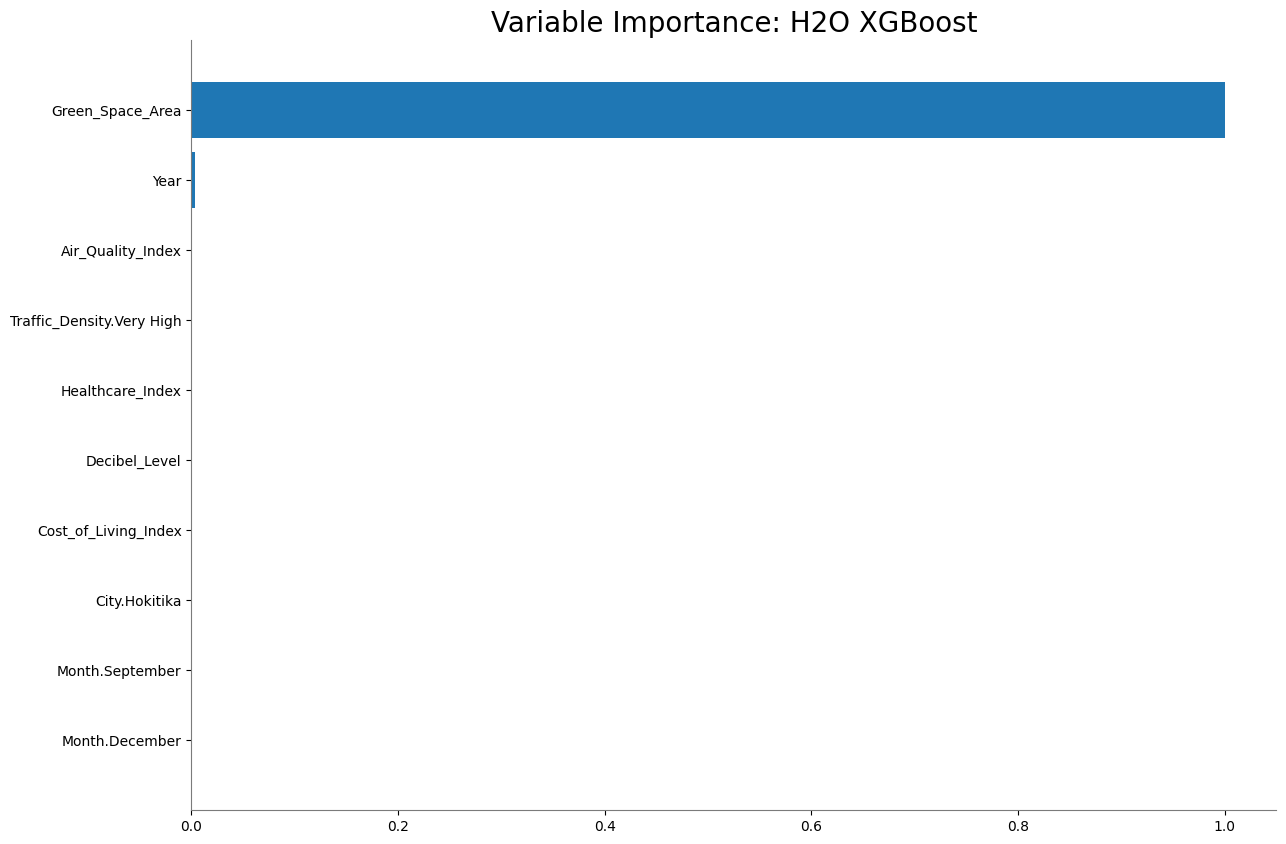

<Figure size 640x480 with 0 Axes>

In [ ]:
best_xgb_model.varimp_plot()


After performing Hyper-parameter Tuning , we still get the most influential feature appears to be Green_Space_Area.Very High, which has the longest bar and thus the highest score on the importance scale. This suggests that high traffic density has a strong relationship with the model's predictions, likely the Happiness_Score.

# Model Interpretability

In [ ]:
from sklearn.preprocessing import StandardScaler

# URL of the raw dataset
url = 'https://raw.githubusercontent.com/VinaySathe-NEU/Data-Science-Assignments/main/train.csv'

# Import the dataset
data = pd.read_csv(url)

# Convert 'Traffic_Density' to dummy variables
data_encoded = pd.get_dummies(data, columns=['Traffic_Density'], drop_first=True)

# Drop 'City' and 'Month' columns for simplicity
data_encoded.drop(columns=['City', 'Month'], inplace=True)

# Separate features and target
X = data_encoded.drop('Happiness_Score', axis=1)
y = data_encoded['Happiness_Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the linear model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Print coefficients
print("Coefficients:", linear_model.coef_)


Coefficients: [ -0.09031148   0.33886998 -43.40229856  -0.2307243   -2.05458458
   2.9910303    0.73248006   0.59034831  -0.07193974]


This process is done to predict the 'Happiness_Score' based on the other factors in the dataset. Encoding, dropping irrelevant features, scaling, and model fitting are all standard steps in preparing the data and building a predictive model.

One-hot encoding transforms categorical data into a numerical format that the model can use. Dropping columns can simplify the model and reduce dimensionality. Splitting the data ensures that we can test the model's performance on unseen data. Scaling standardizes the data which is critical for linear regression as it assumes that all features are centered around zero and have variance in the same order. Finally, fitting the model involves using the least squares method to find the line that best fits the training data.

 The impact of fitting a linear model and interpreting its coefficients is that it provides an understanding of the relationships between features and the target variable. It can offer insights such as which features are most important for predicting happiness and how each feature affects happiness.

 If a coefficient is positive, it means that as the value of the corresponding feature increases, the predicted value of the target variable also increases.

If a coefficient is negative, an increase in the value of the corresponding feature will decrease the predicted value of the target variable.

The magnitude of the coefficient gives you an idea of the strength of the impact. Larger absolute values mean a stronger effect.


Decibel_Level (Coefficient: -0.09031148):
Higher decibel levels, indicating more noise, are associated with a slight decrease in the Happiness Score Index.

Green_Space_Area (Coefficient: 0.33886998):
More green space area is associated with an increase in the Happiness Score Index.

Air_Quality_Index (Coefficient: -43.40229856):
This is a very high negative value, suggesting that poor air quality (assuming higher index values mean worse air) has a substantial negative effect on happiness.

Cost_of_Living_Index (Coefficient: -0.2307243):
An increase in the cost of living is associated with a decrease in happiness, although the effect is relatively small.

Healthcare_Index (Coefficient: -2.05458458):
Surprisingly, this coefficient is negative, suggesting that higher healthcare quality (assuming a higher index indicates better healthcare) is associated with lower happiness scores. This could be due to multicollinearity or an artifact of how the data was processed.

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.8 MB/s eta 0:00:00


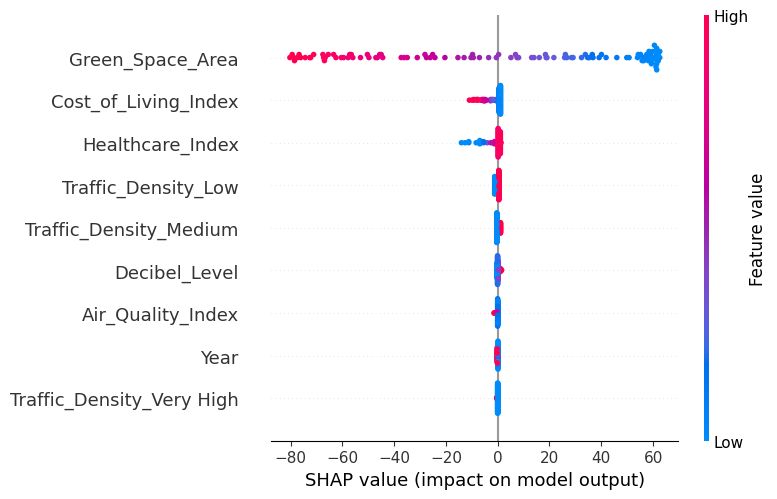

In [ ]:
import shap
# Initialize SHAP Explainer for the linear model
explainer_linear = shap.Explainer(linear_model, X_train_scaled)
shap_values_linear = explainer_linear(X_test_scaled)

# Summary plot for the linear model's SHAP values
shap.summary_plot(shap_values_linear, X_test_scaled, feature_names=X_train.columns)

SHAP values provide a measure of the impact of each feature on the model's prediction. The SHAP summary plot visualizes the distribution of the impacts each feature has on the model's output. SHAP values explain the output of the model as a sum of effects attributed to each feature. Unlike feature importances from tree-based models, which give a global picture, SHAP values provide detailed insights into the contribution of each feature to each prediction.

Each point on the summary plot represents a SHAP value for a feature and an instance. The position on the X-axis indicates the impact on the model's prediction, with the color representing the feature value (red high, blue low).

Features are ordered by the sum of SHAP value magnitudes over all samples, and the plot shows that Green_Space_Area and Cost_of_Living_Index have the highest impact on predictions.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Fit a Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

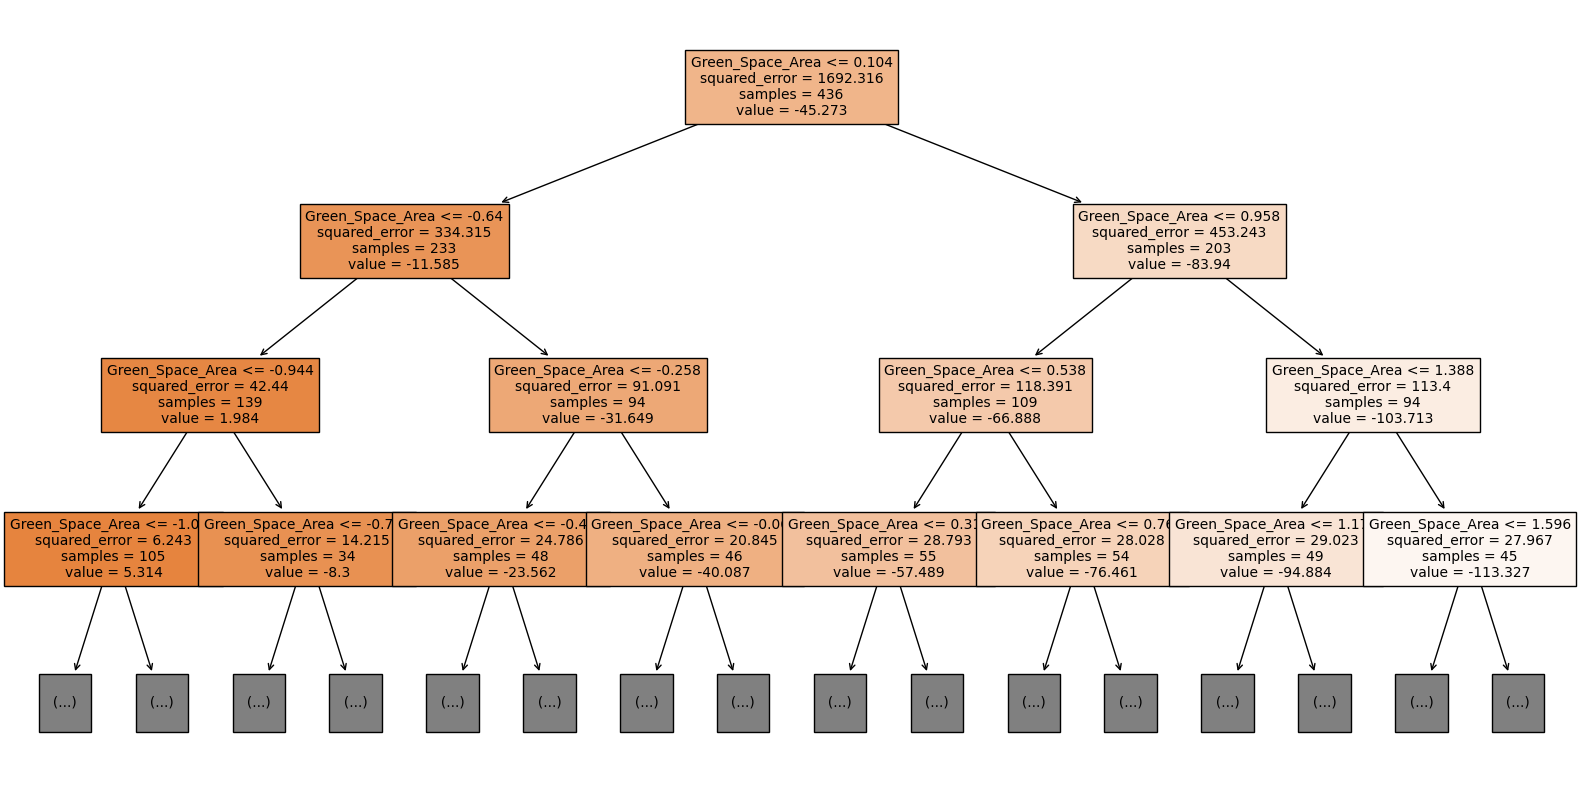

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, max_depth=3, filled=True, feature_names=X_train.columns, fontsize=10)
plt.show()

Interpretation of the Tree:

The tree splits the data into branches based on conditions (inequalities) on the Green_Space_Area feature.
Each node in the tree shows:
The condition used to split the data (e.g., Green_Space_Area <= -0.64).
The mean squared error (MSE) of that node, indicating the average squared difference between the observed actual outcome values and the values predicted by the model.
The number of samples that fall into that node.
The average value of the target variable (Happiness_Score) for the samples in the node.

The visualization shows that Green_Space_Area is a significant predictor of Happiness_Score, as it's used for the initial splits. This indicates that, in the model's learned structure, the area of green space is pivotal in predicting happiness. Understanding this can impact decisions on urban planning, where increasing green spaces could be associated with higher happiness scores among the population.

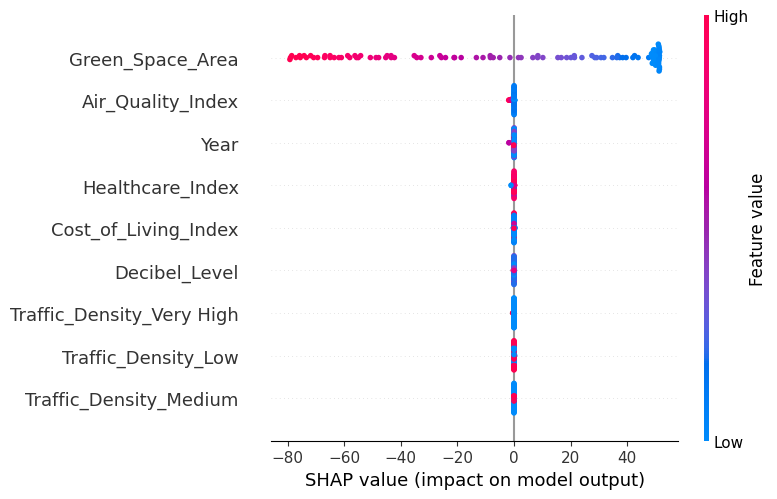

In [ ]:
# Initialize a SHAP Explainer for the Decision Tree model
explainer_tree = shap.Explainer(tree_model, X_train_scaled)

# Calculate SHAP values for the Decision Tree model, bypassing the additivity check
shap_values_tree = explainer_tree(X_test_scaled, check_additivity=False)

# Summary plot for the Decision Tree model's SHAP values
shap.summary_plot(shap_values_tree, X_test_scaled, feature_names=X_train.columns)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 5 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_1ryeue
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.996 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%
Best Model ID: xgb_grid_model_48
Best Model RMSE on Validation Set: 0.5618214646086753


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

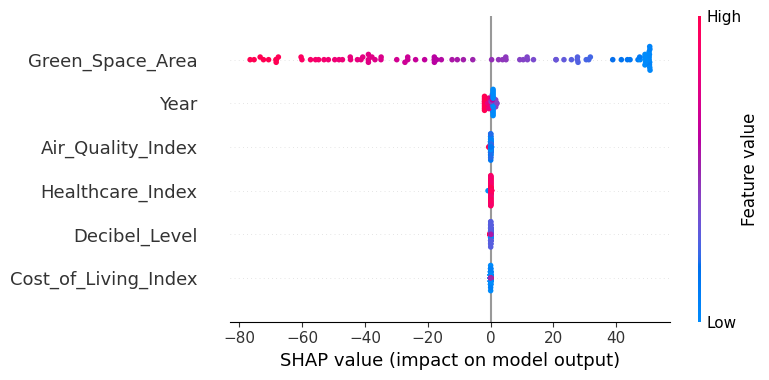

In [ ]:
import h2o
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
import pandas as pd
import xgboost as xgb
import shap

# Initialize H2O
h2o.init()

# Load the dataset
url = 'https://raw.githubusercontent.com/VinaySathe-NEU/Data-Science-Assignments/main/train.csv'
df = h2o.import_file(url)

# Split the dataset
train, validate, test = df.split_frame(ratios=[0.7, 0.15], seed=42)

# Specify the target and features
target = 'Happiness_Score'
features = df.columns
features.remove(target)

# Define hyperparameters to tune
xgb_hyper_params = {
    "learn_rate": [0.01, 0.1],
    "max_depth": [3, 5, 9],
    "sample_rate": [0.8, 1.0],
    "col_sample_rate": [0.2, 0.5, 1.0]
}

# Set up Grid Search
search_criteria = {"strategy": "Cartesian"}
xgb_grid = H2OGridSearch(
    model=H2OXGBoostEstimator,
    grid_id='xgb_grid',
    hyper_params=xgb_hyper_params,
    search_criteria=search_criteria
)

# Train models with Grid Search
xgb_grid.train(x=features, y=target, training_frame=train, validation_frame=validate, ntrees=100)

# Evaluate and select the best model
best_xgb_model = xgb_grid.get_grid(sort_by='rmse', decreasing=False).models[0]
print("Best Model ID:", best_xgb_model.model_id)
print("Best Model RMSE on Validation Set:", best_xgb_model.model_performance(validate).rmse())

# Convert H2O frames to pandas DataFrames
train_df = train.as_data_frame()
test_df = test.as_data_frame()

# Drop the columns 'City', 'Month', and 'Traffic_Density'
columns_to_drop = ['City', 'Month', 'Traffic_Density']
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

# Update the features list by removing the dropped columns
features = [feature for feature in features if feature not in columns_to_drop]

# Prepare the dataset for XGBoost
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Extract parameters from the best H2O model
best_params = {
    'max_depth': best_xgb_model.params['max_depth']['actual'],
    'eta': best_xgb_model.params['learn_rate']['actual'],
    'subsample': best_xgb_model.params['sample_rate']['actual'],
    'colsample_bytree': best_xgb_model.params['col_sample_rate']['actual'],
    'objective': 'reg:squarederror'
}

# Re-train the model using XGBoost with the parameters from the best H2O model
xgb_model = xgb.train(best_params, dtrain, num_boost_round=best_xgb_model.params['ntrees']['actual'])

# Perform SHAP analysis
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)



This SHAP summary plot visualizes the impact of each feature on the model's prediction for the best model identified by H2O, which is used to evaluate how feature values are associated with changes in the predicted outcome.

The plot implies that higher values of Green_Space_Area tend to increase the happiness score predictions, aligning with previous models' insights. The Year feature also has a range of effects, with a cluster of high SHAP values, suggesting its predictive importance may vary considerably across different instances in the data. This variation could be due to interactions with other features or non-linear relationships within the dataset.

## Final Outcomes:

The AutoML's best model with its Hyperparameter's tuned is the best model for this task as it has the highest accuracy compared to the other models tested in this excercise. Also, this model is interpretible i.e. we can actually get to the root of what made this prediction to come to.


## Learning Outcomes:

* I learned the complete lifecycle of a Data Science project right from data prepartion to hyperparameter tuning.

* Majority of the time should be invested in data preparation i.e. cleaning the data, normalizing, feature selection, imputation etc.

* Hyperparameter tuning is the second most important thing after data preparation, which most of the practioner's ignore. But the results are worth the time invested.

* Multiple models must be trained and the best models should be selected to be deployed, as some algorithms perform much better than the other's on specific tasks.

* Model Interpretation is the best takeaway from the series of this assignments.


* SHAP Analysis have made it easier to understand what made a model to predict a outcome.

# **LICENSE**

**MIT License**

Copyright (c) 2024 Vinay Sathe

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **REFERENCES**
H2O.ai- https://docs.h2o.ai/
OLS Model- http://net-informations.com/ds/mla/ols.html
Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/
Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression
Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot
Professor's Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML